In [1]:
import numpy as np

from CSR import *
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from tools import plot_surface

/sdf/group/ad/beamphysics/jytang/pyDFCSR/pyDFCSR_2D/deposit.py:9: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def histogram_cic_1d(q1, w, nbins, bins_start, bins_end):
/sdf/group/ad/beamphysics/jytang/pyDFCSR/pyDFCSR_2D/deposit.py:41: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def histogram_cic_2d(q1, q2, w,


## Run DFCSR

In [2]:
testCSR = CSR2D(input_file= 'input/dipole_config.yaml')

In [3]:
testCSR.run()

Calculating CSR at s= 0.05
--- 30.29555654525757 seconds ---
Beams written to  /sdf/group/ad/beamphysics/jytang/pyDFCSR/pyDFCSR_2D/output/flatbeam_R1.5_exit-2023-11-26T22_41_06-08_00-particles.h5
Wakes written to  /sdf/group/ad/beamphysics/jytang/pyDFCSR/pyDFCSR_2D/output/flatbeam_R1.5_exit-2023-11-26T22_41_06-08_00-wakes.h5
Finish step 2 in 30.98353600502014 seconds
Calculating CSR at s= 0.1
--- 30.735074996948242 seconds ---
Beams written to  /sdf/group/ad/beamphysics/jytang/pyDFCSR/pyDFCSR_2D/output/flatbeam_R1.5_exit-2023-11-26T22_41_06-08_00-particles.h5
Wakes written to  /sdf/group/ad/beamphysics/jytang/pyDFCSR/pyDFCSR_2D/output/flatbeam_R1.5_exit-2023-11-26T22_41_06-08_00-wakes.h5
Finish step 3 in 31.331600666046143 seconds
Calculating CSR at s= 0.15000000000000002
--- 30.556588888168335 seconds ---
Beams written to  /sdf/group/ad/beamphysics/jytang/pyDFCSR/pyDFCSR_2D/output/flatbeam_R1.5_exit-2023-11-26T22_41_06-08_00-particles.h5
Wakes written to  /sdf/group/ad/beamphysics/jyt

## Parallel Run with MPI

In [ ]:
# input yaml file in "./input/dipole_config.yaml"
!mpirun -n 4 python  -m pyDFCSR_mpi_run ./input/chicane_config.yaml

## Plot output

In [4]:
from plot_from_output import DFCSR_postprocessor

DFplot = DFCSR_postprocessor(run_name = 'flatbeam_R1.5_exit-2023-11-26T22_41_06-08_00',
                             work_dir = './output')

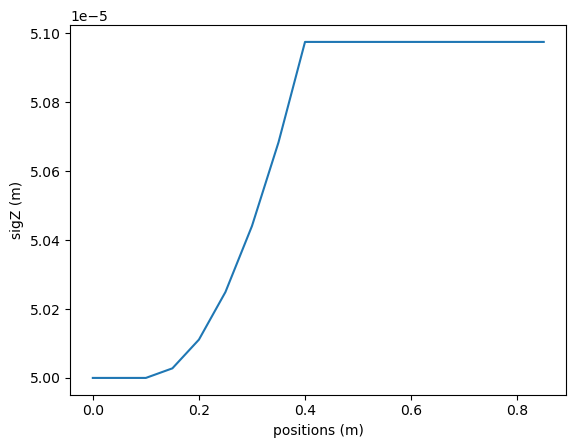

In [5]:
# Plot beam size along the lattice
DFplot.plot_stats(key = 'sigZ')

plot longitudinal wakes at nearest point s  = 0.8500000000000002 m, step count 17
ebeam energy 5000000026.236993


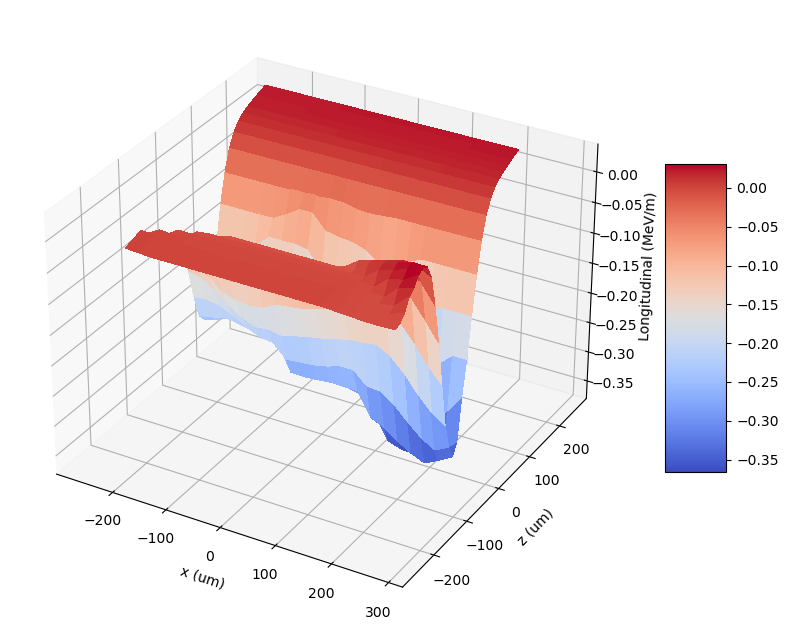

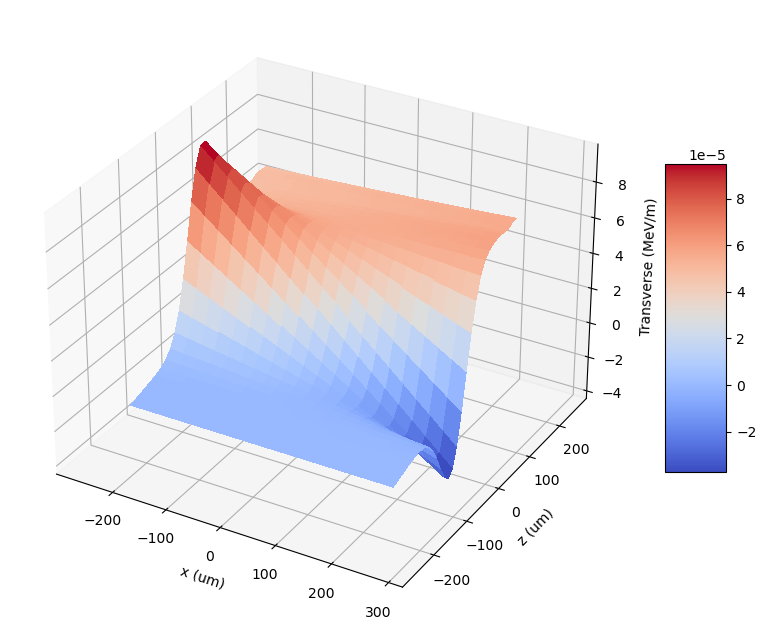

In [10]:
DFplot.plot_wakes(s = 0.9)

plot longitudinal wakes at nearest point s  = 0.9999999999999999 m, step count 10


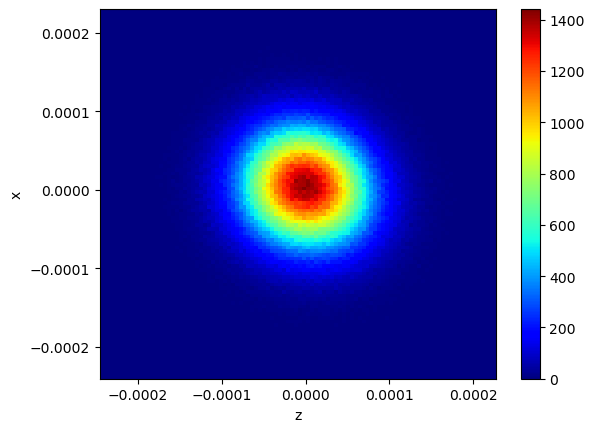

In [14]:
DFplot.plot_particles(s = 1.0, xkey = 'z', ykey = 'x')

In [14]:
testCSR.formation_length

0.18171205928321402